# K-Means Clustering

## Importing the libraries

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [27]:
dataset = pd.read_csv('./Mall_Customers.csv')
X = dataset.iloc[:, [3,4]].values # Annual Income (k$)	Spending Score (1-100)
# X = dataset.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values

## Using the elbow method to find the optimal number of clusters

In [28]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11): # 1, 2, ... , 9, 10
  kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_) # wcss value

print(wcss)

[269981.28, 183653.3289473684, 106348.37306211119, 73880.64496247195, 44448.45544793371, 40825.16946386946, 33642.579220779226, 26686.83778518778, 24766.471609793443, 23103.122085983916]


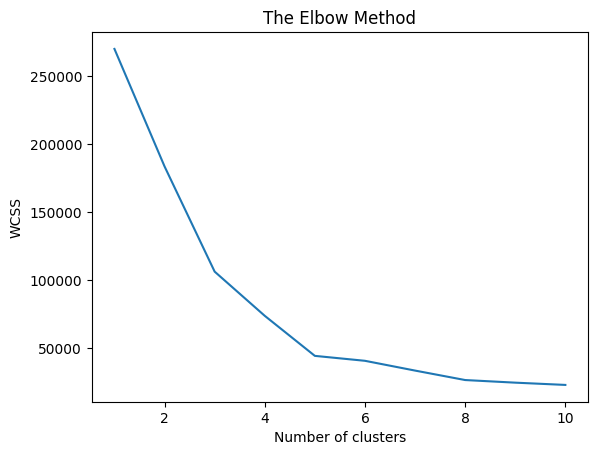

In [29]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# optimal # of clusters: 5

## Training the K-Means model on the dataset

In [24]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X) 
# DV: 0, 2, 3, 4, 4 (indicate to cluster group)
# return dependent values

In [25]:
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

## Visualising the clusters

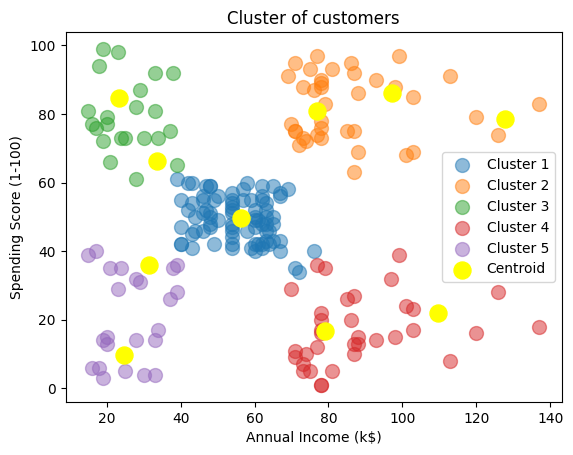

In [49]:
# cluster 0, 1, 2, 3, 4
for i in range(5):
  plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 100, alpha = 0.5, label = f'Cluster {i + 1}')

# cluster center
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'yellow', label = "Centroid")

plt.title('Cluster of customers')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()
